# Decision Tree Algorithm with Python Scikit Learn

### In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement Decision Tree Algorithm.

## The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 



# Author - Ashutosh Tiwari

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=15,8

# Load the given dataset using Pandas

In [3]:
iris = pd.read_csv('iris.csv')

# Checking the head of the given dataset

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking the tail of the given dataset

In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Checking Datatypes of the given dataset

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Checking the describe of the given dataset

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Droping ID Column of the given dataset

In [8]:
iris.drop(['Id'], axis=1, inplace=True)


# Checking null values using heat map

<AxesSubplot:>

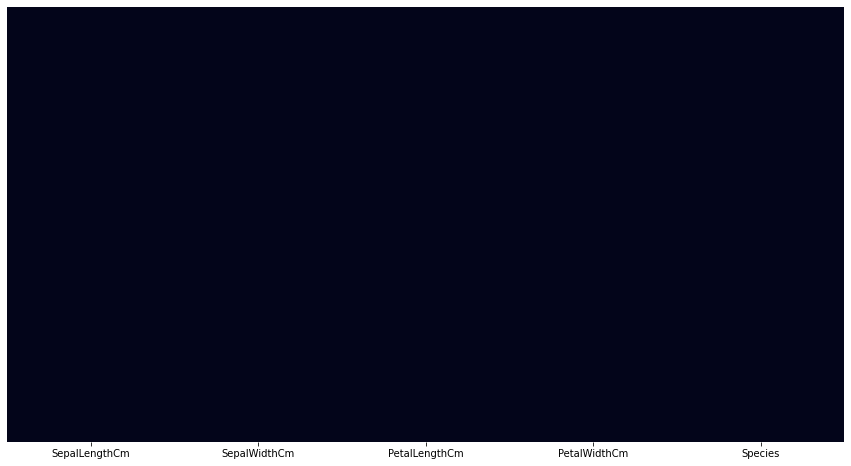

In [9]:
sns.heatmap(iris.isnull(), yticklabels=False, cbar=False)

# Ploting the pairplot of the given dataset using hue as Species 

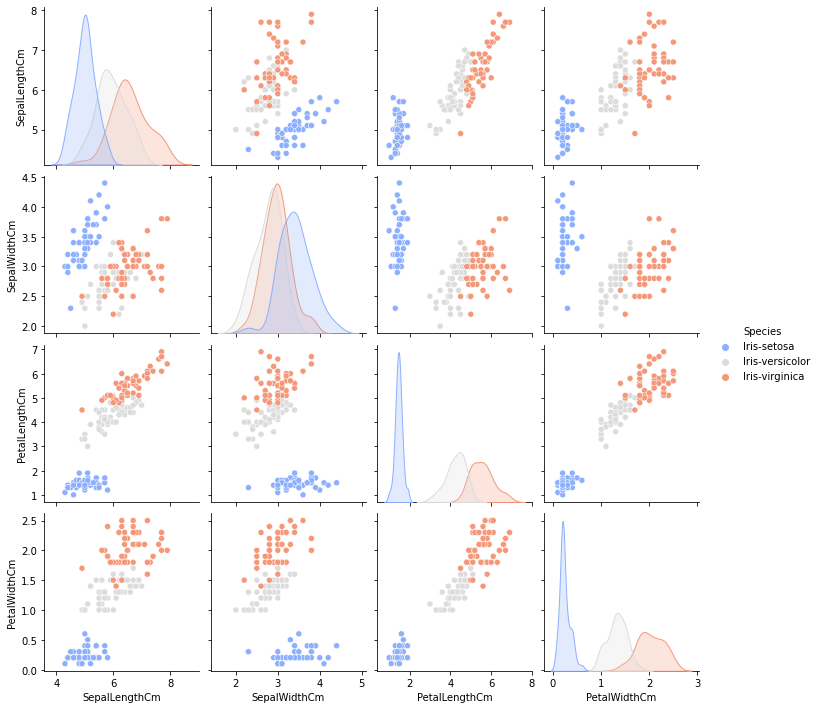

In [10]:
sns.pairplot(iris, hue='Species', palette='coolwarm')

# Function for returning numerical values for Species column of the given dataset

In [48]:
def species_rename(sp):
    if sp == 'Iris-setosa':
        return 0
    elif sp == 'Iris-virginica':
        return 1
    else:
        return 2

In [50]:
iris['Species'] = iris['Species'].apply(species_rename)

# Checking sample of the dataset after changing the Species column value

In [51]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,4.7,3.2,1.6,0.2,2
115,6.4,3.2,5.3,2.3,2
70,5.9,3.2,4.8,1.8,2
101,5.8,2.7,5.1,1.9,2
112,6.8,3.0,5.5,2.1,2


# Assigning the values to the variable X and y

In [14]:
X = iris.drop(['Species'], axis=1)
y=iris['Species']

# Train Test Split
Let's split up the data into a training set and a test set!

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

# Decision Trees
We'll start just by training a single decision tree.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)
print('Training Complete')

Training Complete


# Prediction and Evaluation
Let's evaluate our decision tree.

In [20]:
y_predict = dtree.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(y_test, y_predict))

[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]


In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Creating a new dataframe of Actual value and prediction value

In [21]:
df = pd.DataFrame({'Actual':y_test, 'Predict':y_predict})

In [22]:
df.sample(5)

,Actual,Predict
24,0,0
62,2,2
45,0,0
44,0,0
114,1,1


# Tree Visualization


In [46]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image  

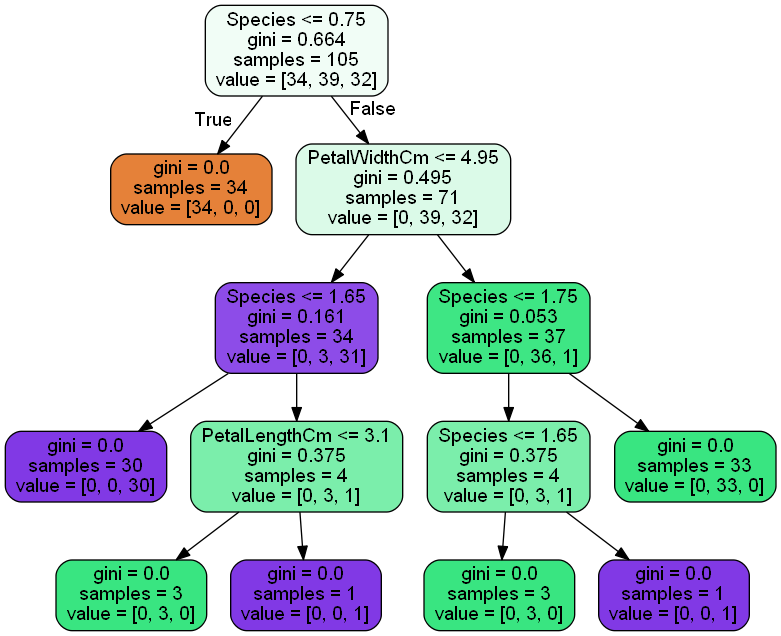

In [47]:
export_graphviz(
        dtree,
        out_file="desision_tree.dot",
        feature_names=list(iris.columns[1:]),
        rounded=True,
        filled=True,
)

(graph,) = pydot.graph_from_dot_file('desision_tree.dot')
graph.write_png('desision_tree.png')

Image(filename='desision_tree.png')

# Checking the accuracy of the model

In [38]:
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test, y_predict))

Accuracy: 0.9777777777777777


# Random Forests
Now let's compare the decision tree model to a random forest.

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,rfc_pred))

[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]


In [33]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

